In [1]:
#importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing csv file
df = pd.read_csv(r"C:\Users\pedro\Desktop\Ironhack\we_fn_use_c_marketing_customer_value_analysis.csv")
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#checking variable types
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
#creating a subset containing only numerical variables
df_numerical = df.select_dtypes(include = np.number)
df_numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


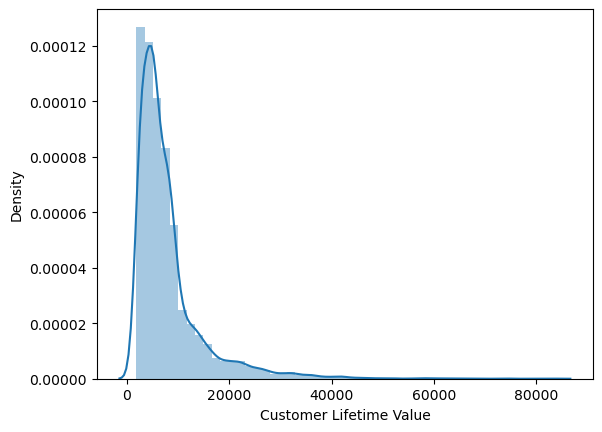

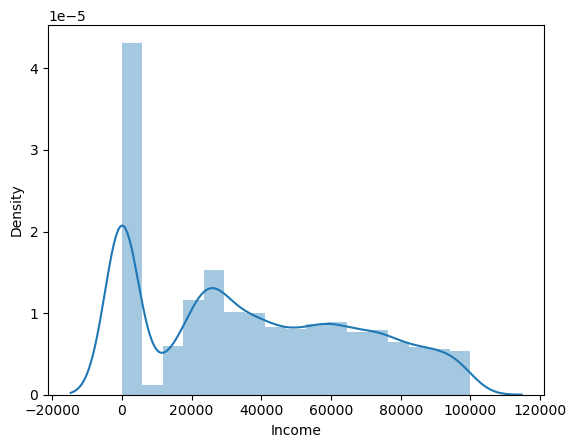

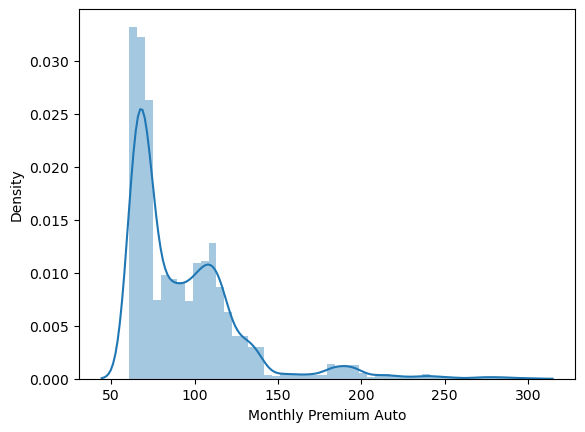

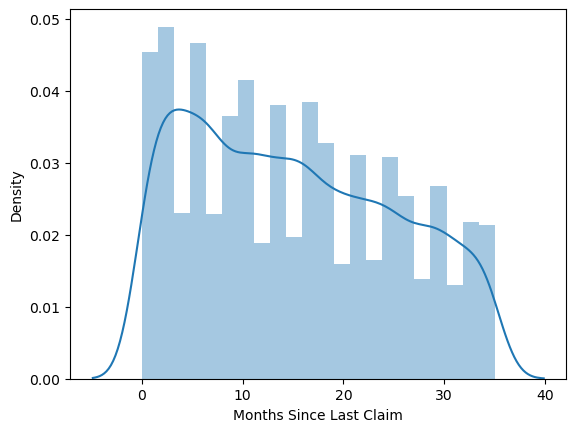

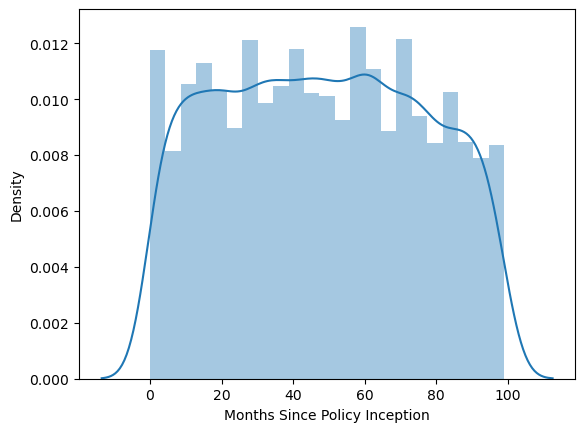

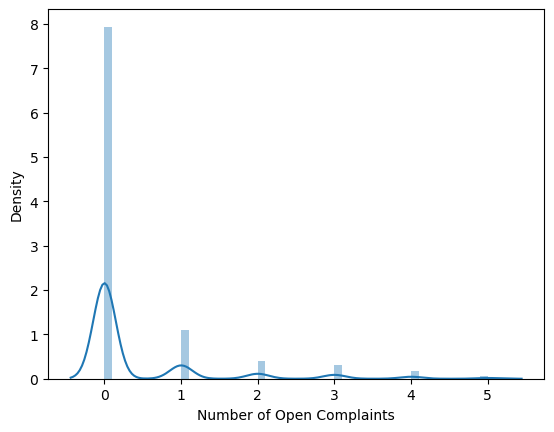

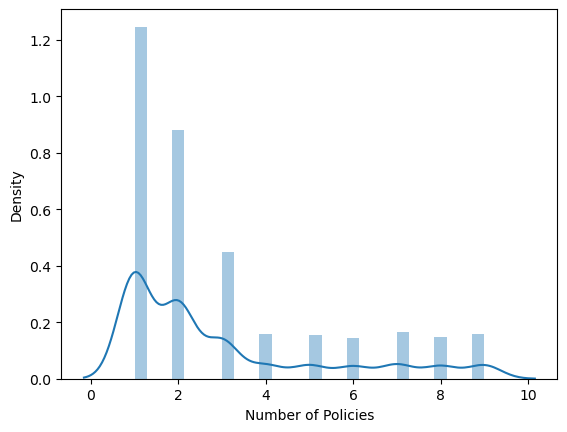

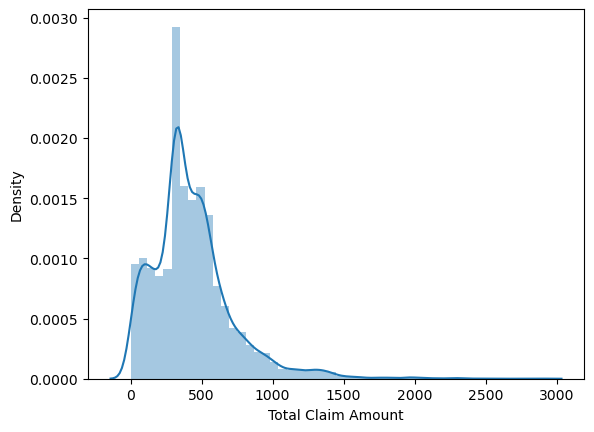

In [5]:
#plotting distributions. 
#none of the variables adjust to a normal distribution
#customer lifetime value seems to adjust to an exponential distribution

for col in df_numerical.columns:
    sns.distplot(df_numerical[col])
    plt.show()

In [7]:
#applying logarithmic transformation

log_df=np.log1p(df_numerical)
log_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,7.924622,10.938006,4.248495,3.496508,1.791759,0.000000,0.693147,5.955348
1,8.850881,0.000000,4.553877,2.639057,3.761200,0.000000,2.197225,7.032152
2,9.464085,10.794830,4.691348,2.944439,3.663562,0.000000,1.098612,6.341192
3,8.942051,0.000000,4.672829,2.944439,4.189655,0.000000,2.079442,6.274539
4,7.942608,10.688233,4.304065,2.564949,3.806662,0.000000,0.693147,4.935415
...,...,...,...,...,...,...,...,...
9129,10.060790,11.183616,4.304065,2.944439,4.499810,0.000000,1.098612,5.294484
9130,8.038354,9.980680,4.382027,2.708050,3.367296,0.000000,0.693147,5.940697
9131,9.007599,0.000000,4.454347,2.302585,3.637586,1.386294,1.098612,6.674290
9132,8.926045,9.996158,4.574711,3.555348,1.386294,0.000000,1.386294,6.539875


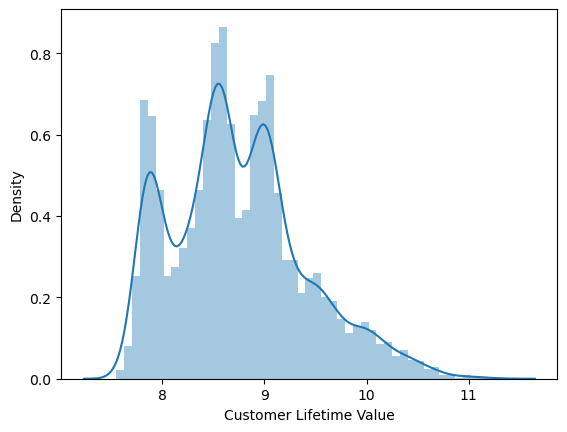

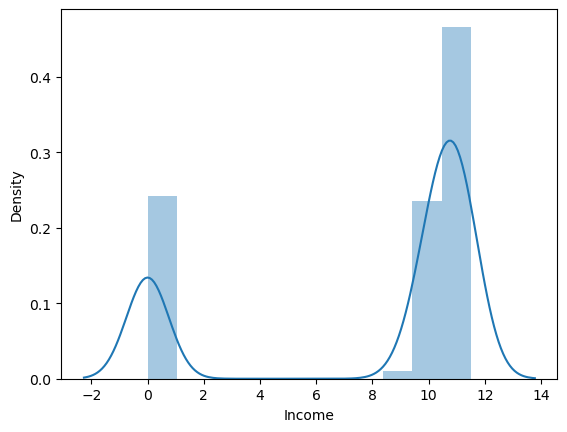

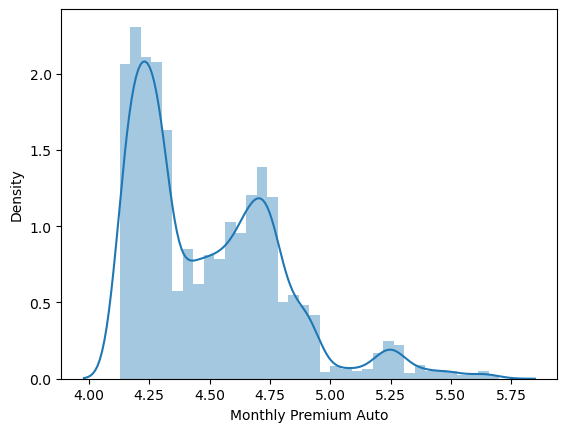

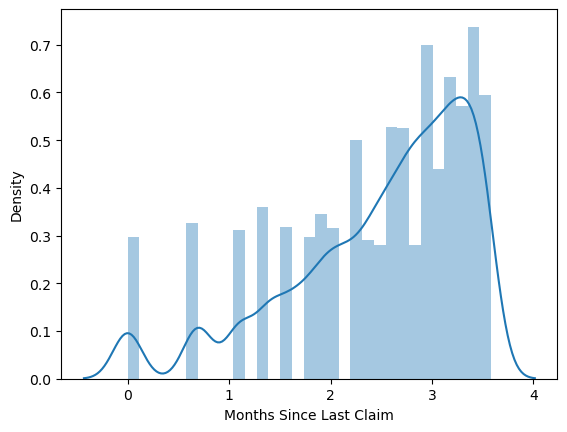

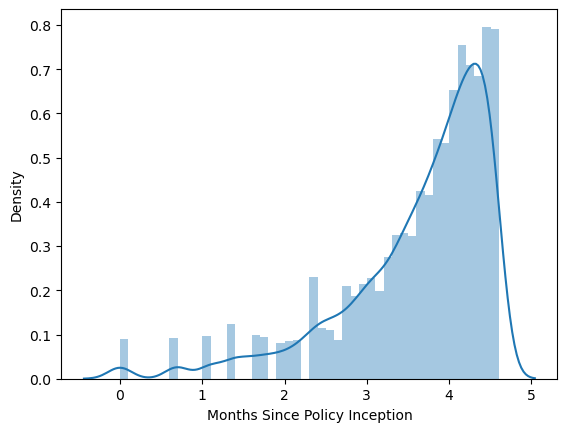

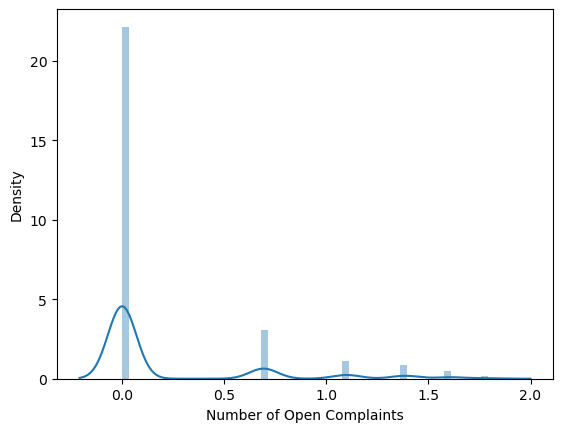

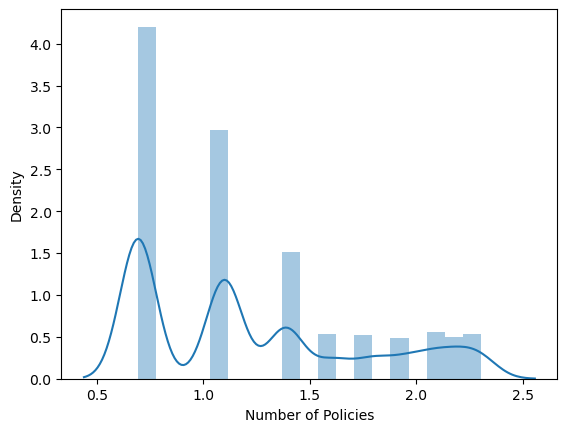

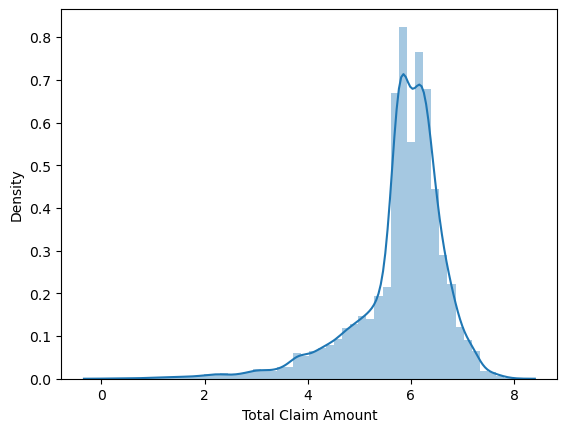

In [8]:
#total claim amount could be considered approximately normal if the left-tail wasn´t so long
for col in log_df.columns:
    sns.distplot(log_df[col])
    plt.show()

In [11]:
#applying square root transformation
sqrt_df=np.sqrt(df_numerical)
sqrt_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,52.569186,237.221416,8.306624,5.656854,2.236068,0.000000,1.000000,19.616604
1,83.543617,0.000000,9.695360,3.605551,6.480741,0.000000,2.828427,33.637255
2,113.522824,220.832516,10.392305,4.242641,6.164414,0.000000,1.414214,23.800677
3,87.440619,0.000000,10.295630,4.242641,8.062258,0.000000,2.645751,23.019152
4,53.044251,209.370485,8.544004,3.464102,6.633250,0.000000,1.000000,11.752909
...,...,...,...,...,...,...,...,...
9129,152.990156,268.218195,8.544004,4.242641,9.433981,0.000000,1.414214,14.079587
9130,55.646305,146.982992,8.888194,3.741657,5.291503,0.000000,1.000000,19.473058
9131,90.354250,0.000000,9.219544,3.000000,6.082763,1.732051,1.414214,28.120899
9132,86.743544,148.124947,9.797959,5.830952,1.732051,0.000000,1.732051,26.290683


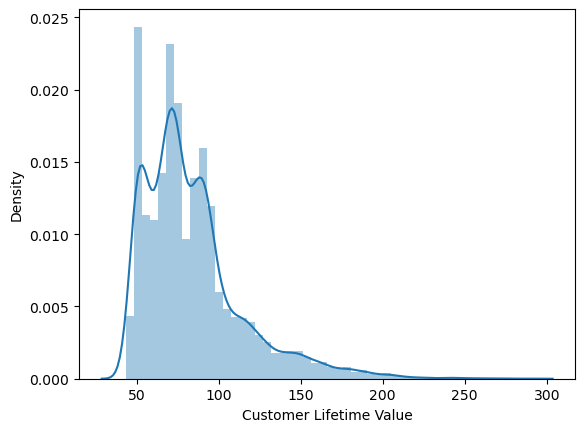

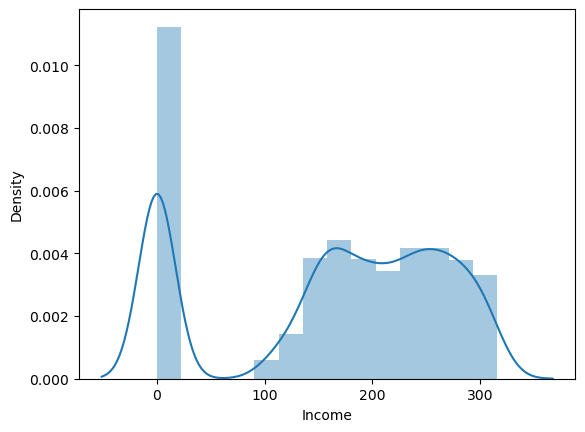

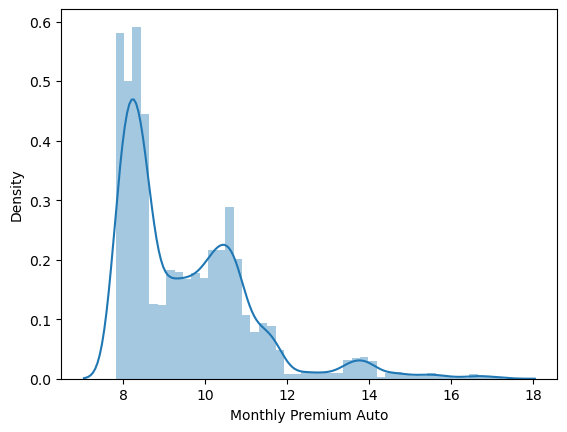

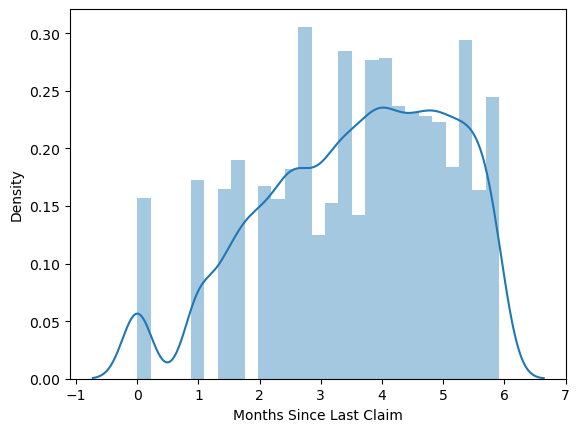

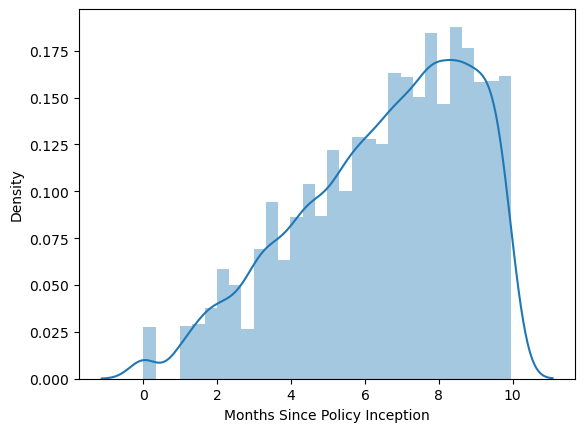

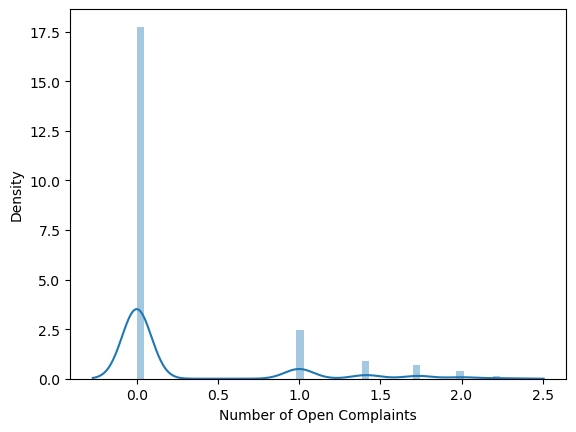

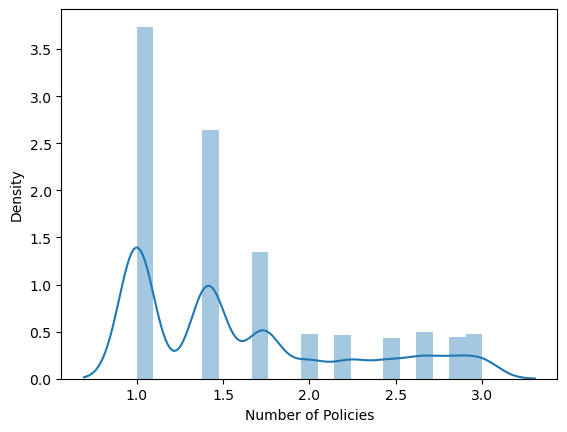

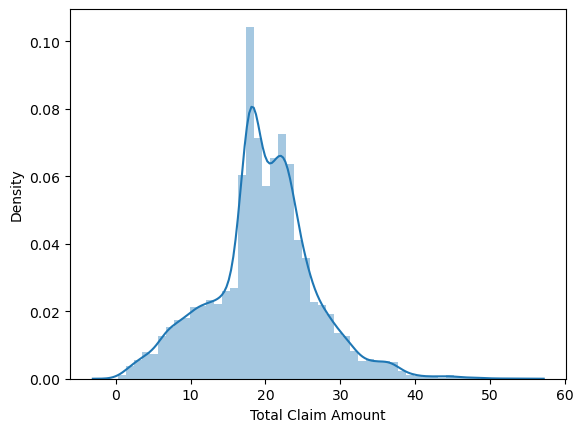

In [12]:
#total claim amount could be considered approximately normal

for col in sqrt_df.columns:
    sns.distplot(sqrt_df[col])
    plt.show()